# Home Assignment 3

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, KFold
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler, PowerTransformer, FunctionTransformer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # enable showing all columns of the df

## 1. Data pre-processing

### 1.1 Data Loading

In [2]:
### Loading the data ###

X_train, X_ivs, y_train, col_names = pickle.load(open("drd2_data.pickle", "rb"))

### 1.2. Exploratory Data Analysis

In [3]:
### Convert to pandas dataframe ###

X_train_df = pd.DataFrame(X_train, columns=col_names)
Y_train_df = pd.DataFrame(y_train, columns=['Molecular Activity'])

X_train_df, X_test_df, Y_train_df, Y_test_df = train_test_split(X_train_df, Y_train_df, test_size=0.2, random_state=42)

Y_ivs_df = pd.DataFrame(X_ivs, columns=col_names)

In [119]:
### Check dimensions ###

print("X_train_df.shape: ", X_train_df.shape)
print("Y_train_df.shape: ", Y_train_df.shape)
print("X_test_df.shape: ", X_test_df.shape)
print("Y_test_df.shape: ", Y_test_df.shape)
print("Y_ivs_df.shape: ", Y_ivs_df.shape)

X_train_df.shape:  (5869, 2132)
Y_train_df.shape:  (5869, 1)
X_test_df.shape:  (1468, 2132)
Y_test_df.shape:  (1468, 1)
Y_ivs_df.shape:  (816, 2132)


In [120]:
### View the data - X_train ###

X_train_df.head()

D00      D01  D02  D03  D04  D05  D06   D07   D08   D09  D10  \
6883  454.178710  454.556  9.0  1.0  6.0  1.0  9.0  32.0  58.0  10.0  1.0   
7325  341.195506  341.445  1.0  0.0  3.0  0.0  1.0  25.0  50.0   3.0  0.0   
527   321.172879  321.420  3.0  1.0  3.0  1.0  3.0  24.0  47.0   3.0  0.0   
5735  411.207053  411.481  7.0  0.0  8.0  0.0  7.0  30.0  56.0   8.0  0.0   
5086  416.156992  416.518  5.0  0.0  7.0  0.0  5.0  29.0  54.0   7.0  0.0   

           D11  D12  D13  D14  D15  D16  D17  D18  D19  D20  D21  D22  D23  \
6883  0.454545  5.0  3.0  2.0  0.0  4.0  2.0  0.0  2.0  0.0  0.0  0.0  0.0   
7325  0.454545  4.0  2.0  2.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0   
527   0.333333  4.0  2.0  2.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
5735  0.363636  4.0  3.0  1.0  1.0  2.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
5086  0.409091  4.0  3.0  1.0  1.0  2.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0   

             D24    D25      D26       D27        D28        D29       D30  \
6883  190.097024  98.31  2.69242  120.9927  19.074463  11.802638  7.069261   
7325  148.217161   3.24  4.77840   96.6360  14.608555   9.366906  6.237710   
527   142.739324  32.70  3.88140   96.7748  14.302311   8.497084  5.468677   
5735  175.166926  55.65  2.94640  113.3130  17.076429  10.073537  5.171730   
5086  169.964911  63.41  4.00372  110.0668  17.290431  11.614068  7.452819   

           D31       D32        D33        D34       D35       D36       D37  \
6883  7.069261  5.012576  18.257966  10.817040  5.962752  5.962752  4.177887   
7325  6.237710  4.546822  14.608555   9.366906  6.237710  6.237710  4.546822   
527   5.468677  4.215338  14.302311   8.497084  5.468677  5.468677  4.215338   
5735  5.171730  3.615575  17.076429  10.073537  5.171730  5.171730  3.615575   
5086  7.452819  5.817779  16.473934   9.961803  5.570415  5.570415  4.081297   

       D38        D39       D40       D41       D42  FP0000  FP0001  FP0002  \
6883 -2.85  21.019786  8.950050  4.242809  5.879005     0.0     0.0     0.0   
7325 -1.74  16.713622  6.873244  3.617088  4.595072     0.0     0.0     0.0   
527  -2.26  15.278392  5.674130  2.153315  3.612149     0.0     0.0     0.0   
5735 -3.13  20.155338  9.579409  4.706637  6.435874     0.0     1.0     0.0   
5086 -2.25  20.040304  8.240841  4.673204  5.694792     0.0     0.0     0.0   

      FP0003  FP0004  FP0005  FP0006  FP0007  FP0008  FP0009  FP0010  FP0011  \
6883     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7325     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
527      0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
5735     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5086     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      FP0012  FP0013  FP0014  FP0015  FP0016  FP0017  FP0018  FP0019  FP0020  \
6883     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
7325     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
527      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5735     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
5086     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      FP0021  FP0022  FP0023  FP0024  FP0025  FP0026  FP0027  FP0028  FP0029  \
6883     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7325     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
527      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5735     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5086     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   

      FP0030  FP0031  FP0032  FP0033  FP0034  FP0035  FP0036  FP0037  FP0038  \
6883     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7325     0.0     0.0     0.0     0.0     0.0     0.0 

In [121]:
### View the data - X_ivs ###

Y_train_df.head()

,Molecular Activity
6883,0.000000
7325,0.250000
527,0.000000
5735,0.198970
5086,0.507495


In [72]:
### Descriptive statistics of X_train ###

X_train_df.describe()

D00          D01          D02          D03          D04  \
count  5869.000000  5869.000000  5869.000000  5869.000000  5869.000000   
mean    430.121337   430.641108     5.424945     1.196626     6.539615   
std     181.517919   181.662574     4.241279     2.533319     6.246417   
min     135.068414   135.166000     1.000000     0.000000     0.000000   
25%     357.063506   357.381000     4.000000     0.000000     4.000000   
50%     419.107040   419.500000     5.000000     1.000000     6.000000   
75%     472.228141   472.673000     6.000000     1.000000     8.000000   
max    3768.848446  3771.262000    92.000000    47.000000   137.000000   

               D05          D06          D07          D08          D09  \
count  5869.000000  5869.000000  5869.000000  5869.000000  5869.000000   
mean      1.118760     4.679673    30.470779    59.123360     6.584086   
std       2.210013     2.846199    12.842143    25.752534     4.484347   
min       0.000000     0.000000    10.000000    19.000000     1.000000   
25%       0.000000     3.000000    25.000000    49.000000     5.000000   
50%       1.000000     4.000000    30.000000    57.000000     6.000000   
75%       1.000000     6.000000    33.000000    65.000000     8.000000   
max      42.000000    58.000000   266.000000   527.000000    93.000000   

               D10          D11          D12          D13          D14  \
count  5869.000000  5869.000000  5869.000000  5869.000000  5869.000000   
mean      0.608792     0.412526     4.157778     2.567899     1.589879   
std       1.381158     0.132361     1.168921     0.998140     0.864138   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.333333     4.000000     2.000000     1.000000   
50%       0.000000     0.400000     4.000000     3.000000     1.000000   
75%       1.000000     0.480000     5.000000     3.000000     2.000000   
max      30.000000     1.000000    14.000000     9.000000     9.000000   

               D15          D16          D17          D18          D19  \
count  5869.000000  5869.000000  5869.000000  5869.000000  5869.000000   
mean      1.054183     2.010394     0.747998     0.869143     1.262396   
std       0.780293     0.970805     0.812761     0.593291     0.685311   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     1.000000     0.000000     1.000000     1.000000   
50%       1.000000     2.000000     1.000000     1.000000     1.000000   
75%       1.000000     3.000000     1.000000     1.000000     2.000000   
max       8.000000     9.000000     4.000000     7.000000     7.000000   

               D20          D21          D22          D23          D24  \
count  5869.000000  5869.000000  5869.000000  5869.000000  5869.000000   
mean      0.032714     0.051798     0.670642     0.254387   182.714165   
std       0.177903     0.376602     1.550136     0.624593    74.726472   
min       0.000000     0.000000     0.000000     0.000000    59.499552   
25%       0.000000     0.000000     0.000000     0.000000   152.965418   
50%       0.000000     0.000000     0.000000     0.000000   178.210302   
75%       0.000000     0.000000     1.000000     0.000000   198.979677   
max       1.000000     8.000000    29.000000    10.000000  1542.223628   

               D25          D26          D27          D28          D29  \
count  5869.000000  5869.000000  5869.000000  5869.000000  5869.000000   
mean     58.068460     4.097019   120.806457    18.210935    11.263092   
std      63.780585     1.419641    47.689741     7.414343     4.538044   
min       3.240000   -10.523160    40.300500     5.593478     3.306776   
25%      35.580000     3.276700   101.542700    15.172833     9.251673   
50%      50.800000     4.083400   117.850700    17.763181    10.971613   
75%      67.260000     4.841420   131.146200    19.857790    12.363376   
max    1365.490000    16.768600   957.020500   150.889493    89.019955   

             

In [73]:
### Descriptive statistics of y_train ###

Y_train_df.describe()

,Molecular Activity
count,5869.000000
mean,0.389157
std,0.276976
min,0.000000
25%,0.170276
50%,0.381497
75%,0.581976
max,1.000000


In [74]:
### Check for missing values in X_train ###

missing_values = X_train_df.isnull().sum().sum()
print("Missing values in X_train:", missing_values)

Missing values in X_train: 0


In [75]:
### Check for missing values in X_ivs ###

X_ivs_df = pd.DataFrame(X_ivs, columns=col_names)
missing_values = X_ivs_df.isnull().sum().sum()
print("Missing values in X_ivs:", missing_values)

Missing values in X_ivs: 0


In [76]:
### Check how many features have only zeroes in X_train###

zero_columns = (X_train_df == 0).all(axis=0).sum()
print("Features that only have zero values in X_train:", zero_columns)

Features that only have zero values in X_train: 0


In [77]:
### Check how many features have only zeroes in X_ivs ###

zero_columns = (X_ivs_df == 0).all(axis=0).sum()
print("Features that only have zero values in X_ivs:", zero_columns)

Features that only have zero values in X_ivs: 0


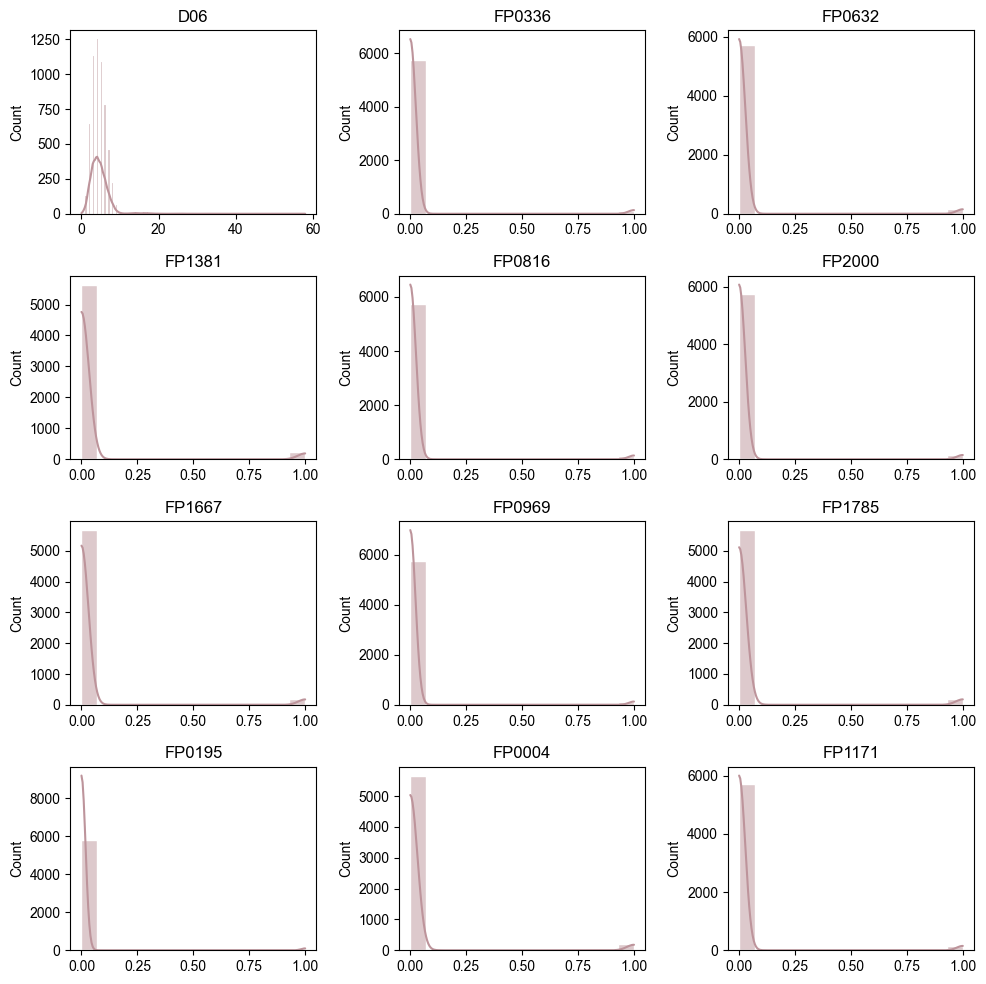

In [149]:
### Plot histograms of random features distributions - X_train ###

def plot_histograms(df, n_cols, n_rows, figsize=(10, 10)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    sns.set(font_scale = 1.5)
    sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#f7f2f3"}) 

    for i, col in enumerate(list(df.columns)):
        ax = axes[int(i/n_cols)][i%n_cols]
        sns.histplot(df[col], kde=True, ax=ax, color='#bd949b')
        ax.set_title(col)
        ax.set_xlabel('')

    fig.tight_layout()
    plt.show()


sampled_attributes = X_train_df.sample(n=12,axis='columns')
plot_histograms(sampled_attributes, 3, 4)

We notice that most of the randomly selected attributes turn out to be binary attributes. Thus, we need to investigate which attributes are binary/categorical.

First we are going to check which attributes are binary

In [122]:
### Checking binary attributes ###

attribute_counter = 0
n = 2

for col_name in X_train_df.columns:
    if X_train_df[col_name].nunique() == n:
        attribute_counter += 1
        unique_values = list(X_train_df[col_name].value_counts().index)
        # print(f'{col_name}: {unique_values}')

print(f'{attribute_counter} attributes with {n} unique values')

2090 attributes with 2 unique values


We see that 2090 out of 2132 attributes (98% of all attributes) are binary and they are all 0/1. Therefore we convert them to boolean type. 

There are no monovalent attributes. 

In [4]:
### Convert Binary Columns to Boolean Type in Training and Test Sets ###

binary_columns = X_train_df.columns[X_train_df.nunique() == 2]
X_train_df[binary_columns] = X_train_df[binary_columns].astype(bool)
X_test_df[binary_columns] = X_test_df[binary_columns].astype(bool)

Let's look at the remaining 42 attributes

In [124]:
### Identify Features with More Than N Unique Values in a DataFrame ###

def show_attributes_with_more_than_n_unique_values(df, n):
    attribute_counter = 0
    
    for col_name in df.columns:
        if df[col_name].nunique() > n:
            unique_values = list(df[col_name].value_counts().index)
            # print(f'{col_name}: {unique_values}')

    print(f'{attribute_counter} attributes with {n} unique values')

show_attributes_with_more_than_n_unique_values(X_train_df, 2)

0 attributes with 2 unique values


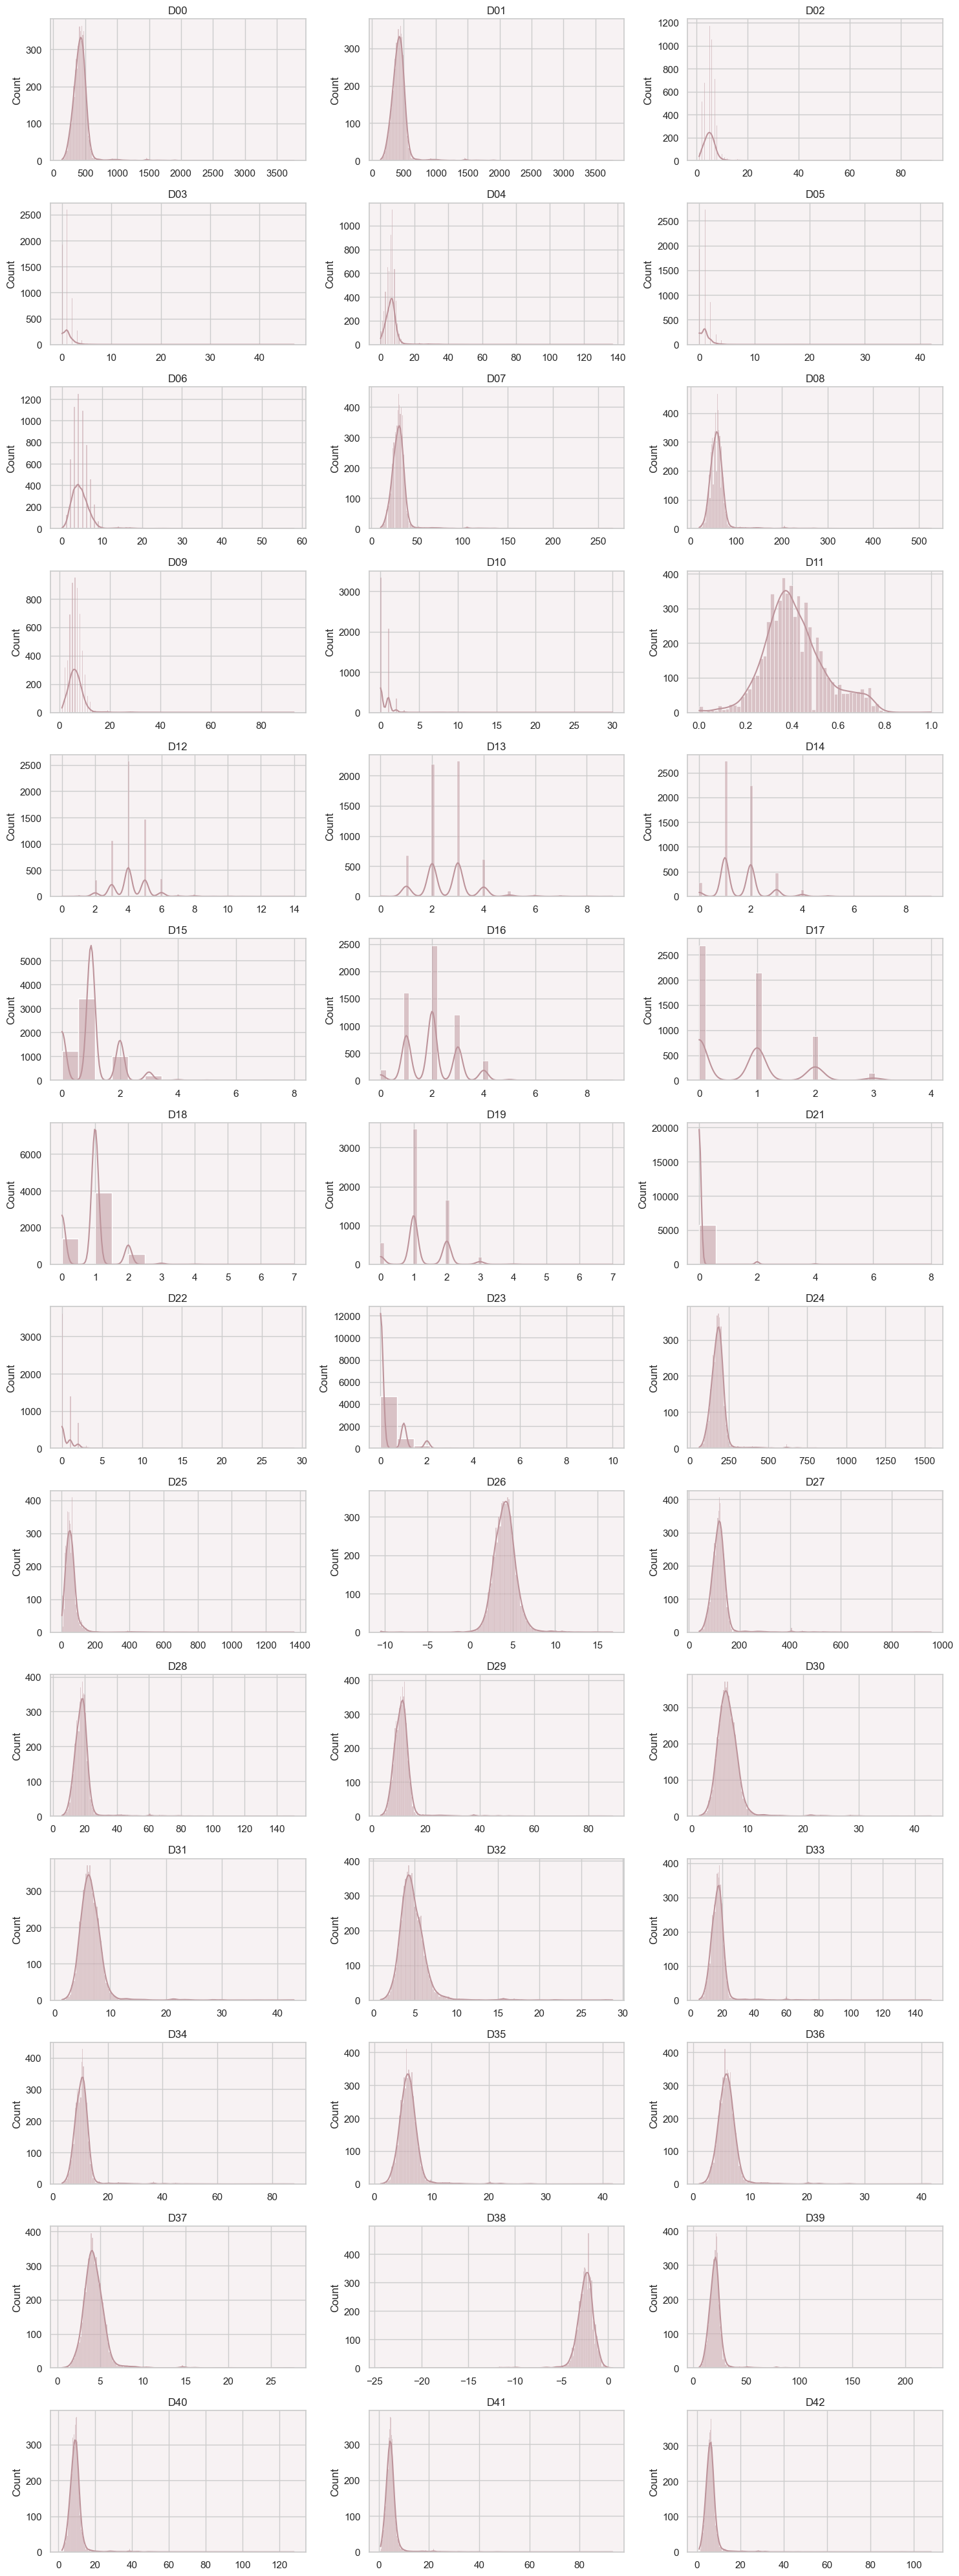

In [153]:
### Plot Histograms of Features with More Than 2 Unique Values ###

columns_with_more_than_2_unique_values = X_train_df.columns[X_train_df.nunique() > 2]
plot_histograms(X_train_df[columns_with_more_than_2_unique_values], 3, 14, figsize=(15, 40))

We notice that the following columns are discrete, thus should have an integer type: 2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,21,22,23 

In [125]:
### Convert Selected Columns to Integer Type in Training and Test Sets ###

indices = [2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,21,22,23]
cols_to_transform_to_int = ['D'+ str(i).zfill(2) for i in indices]

X_train_df[cols_to_transform_to_int] = X_train_df[cols_to_transform_to_int].astype('int64')
X_test_df[cols_to_transform_to_int] = X_test_df[cols_to_transform_to_int].astype('int64')

Note to group: Should we consider removing some of the features that have 98-99% of zeroes? 
- Karina: In my opinion if we wanted to remove some columns, we should rather look at variance, and if it's very small we could potentially remove them. But still I think we can leave all the columns for now, the proffesor mentioned on the lecture that removing the columns with small variance it not always a good choice. Sometimes we can miss something important.
- Catia: Yes, I remember that too and I agree. I was just wondering if we could also run the model without those columns and see if it makes a difference. Even if it doesn't, it would be a point to add to report as it highlights what Falcão said. 
- Tatjana: I agree with Catia's approach - we should try running models with and without those features. They may contain some important information for the model.

- Karina: Sure, I also agree, we can test it, but I would remove all columns with a small variance instead of looking only at the columns dominated by zeroes - the goal is the same but sounds more professional haha and it's easier to defend this decision in the report.
- OK, let's do that then. 

In [154]:
### Check how many features have small variance in X_train ###

small_variance_columns = (X_train_df.var() < 0.01).sum()
print("Features that have small variance in X_train:", small_variance_columns)

Features that have small variance in X_train: 153


In [5]:
### Check how many features have at least 98% of zeroes in X_train ###

# Threshold percentage
threshold_percentage = 98

# Calculate the percentage of zero values for each feature
zero_percentages = (np.sum(X_train_df == 0, axis=0) / X_train_df.shape[0]) * 100

# Identify features with at least 90% zero values
high_zero_features = np.where(zero_percentages >= threshold_percentage)[0]

print (f"The number of features with at least {threshold_percentage}% zero values in X_train:", len(high_zero_features))
#print(f"Features with at least {threshold_percentage}% zero values in X_train:", high_zero_features)


The number of features with at least 98% zero values in X_train: 821


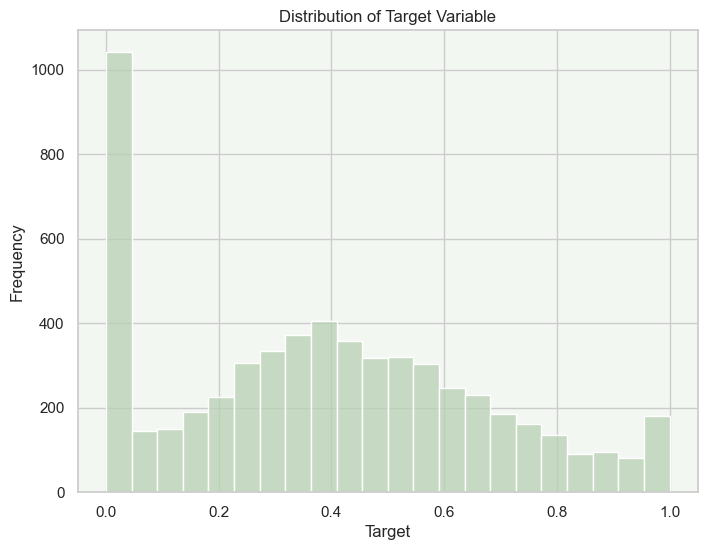

In [86]:
### Check the distribution of the target variable ###

sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#f3f7f2"}) # set the background color
plt.figure(figsize=(8, 6))
sns.histplot(data=Y_train_df, x='Molecular Activity', color='#b8d0b3')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

In [87]:
### Detect Outliers in the data with Isolation Forest ###

from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(X_train)
outliers = clf.predict(X_train_df)
print("Number of outliers:", len(outliers[outliers == -1]))


Number of outliers: 15


### 1.3. Data Pre-processing

### 1.3.1. Feature Selection

1.3.1.1 Random Forest Feature selection

In [127]:
### Random Forest Regressor ###

rfr = RandomForestRegressor(random_state=0, n_estimators=500)
rfr.fit(X_train_df, Y_train_df)

RandomForestRegressor(n_estimators=500, random_state=0)

In [128]:
### Select the most important features ###

most_important_features_rf = []
threshold = 0.001

for i, imp in enumerate(rfr.feature_importances_):
    if imp > threshold:
        most_important_features_rf.append(X_train_df.columns[i])
        # print("Feature", X_train_df.columns[i], "Importance:", imp)

print(f'Selected {len(most_important_features_rf)} most important features:')
print(most_important_features_rf)

Selected 145 most important features:
['D00', 'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D15', 'D16', 'D17', 'D19', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32', 'D33', 'D34', 'D35', 'D36', 'D37', 'D38', 'D39', 'D40', 'D41', 'D42', 'FP0031', 'FP0040', 'FP0053', 'FP0060', 'FP0109', 'FP0111', 'FP0114', 'FP0137', 'FP0143', 'FP0173', 'FP0203', 'FP0244', 'FP0260', 'FP0273', 'FP0293', 'FP0305', 'FP0310', 'FP0319', 'FP0321', 'FP0343', 'FP0347', 'FP0399', 'FP0401', 'FP0429', 'FP0451', 'FP0482', 'FP0503', 'FP0508', 'FP0518', 'FP0527', 'FP0636', 'FP0652', 'FP0722', 'FP0726', 'FP0776', 'FP0796', 'FP0810', 'FP0828', 'FP0830', 'FP0836', 'FP0843', 'FP0846', 'FP0848', 'FP0866', 'FP0881', 'FP0896', 'FP0913', 'FP0916', 'FP0922', 'FP0938', 'FP0939', 'FP0970', 'FP0977', 'FP0986', 'FP0994', 'FP1011', 'FP1020', 'FP1032', 'FP1044', 'FP1078', 'FP1104', 'FP1118', 'FP1124', 'FP1133', 'FP1171', 'FP1176', 'FP1205', 'FP1236', 'FP1241'

In [164]:
### Removing the features with small variance ###

X_train_df_small_var = X_train_df.drop(X_train_df.var()[X_train_df.var() < 0.01].index.values, axis=1)
X_test_df_small_var = X_test_df.drop(X_test_df.var()[X_test_df.var() < 0.01].index.values, axis=1)

# Print number of features before and after removing features with small variance
print("Number of features in X_train before removing features with small variance:", X_train_df.shape[1])
print("Number of features in X_train after removing features with small variance:", X_train_df_small_var.shape[1])
print("Number of features in X_test before removing features with small variance:", X_test_df.shape[1])
print("Number of features in X_test after removing features with small variance:", X_test_df_small_var.shape[1])

Number of features in X_train before removing features with small variance: 2132
Number of features in X_train after removing features with small variance: 1979
Number of features in X_test before removing features with small variance: 2132
Number of features in X_test after removing features with small variance: 1951


1.3.1.2 Removing features with 98% of 0 values

In [6]:
### Removing features with high percentage of zero values - 98% Threshold ###

# Threshold percentage
threshold_percentage = 98

# Calculate the percentage of zero values for each feature
zero_percentages = (np.sum(X_train_df == 0, axis=0) / X_train_df.shape[0]) * 100

# Identify features with at least 98% zero values
high_zero_features = np.where(zero_percentages >= threshold_percentage)[0]

# Remove features with at least 98% zero values
# Remove features with at least 98% zero values
X_train_98_nozeros = X_train_df.drop(X_train_df.columns[high_zero_features], axis=1)
X_test_98_nozeros = X_test_df.drop(X_test_df.columns[high_zero_features], axis=1)

# Print the number of features before and after removing features with at least 98% zero values
print("Number of features before removing features with at least 98% zero values:", X_train_df.shape[1])
print("Number of features after removing features with at least 98% zero values:", X_train_98_nozeros.shape[1])



Number of features before removing features with at least 98% zero values: 2132
Number of features after removing features with at least 98% zero values: 1311


### 1.3.2. Scaling

In [130]:
### Scale the data ###

# Standardize the selected features
scaler = StandardScaler()
columns_to_scale = X_train_df.columns[~X_train_df.columns.isin(binary_columns)]

X_train_df_scaled = X_train_df.copy()
X_test_df_scaled = X_test_df.copy()

X_train_df_scaled[columns_to_scale] = scaler.fit_transform(X_train_df[columns_to_scale])
X_test_df_scaled[columns_to_scale] = scaler.fit_transform(X_test_df[columns_to_scale])
X_train_df_scaled.describe()


,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42
count,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03,5.869000e+03
mean,-4.842683e-17,1.513339e-16,3.389878e-17,-2.300275e-17,-5.811220e-17,6.234955e-17,-2.784543e-17,7.990428e-17,1.162244e-16,1.452805e-17,5.236152e-17,4.128388e-16,3.632013e-16,9.080032e-17,9.443233e-17,3.934680e-17,1.985500e-16,-4.418949e-17,1.452805e-17,2.784543e-17,-6.053354e-19,1.694939e-17,-4.842683e-17,2.808756e-16,-5.750687e-17,-2.905610e-16,1.670726e-16,-2.179208e-17,3.765186e-16,-1.567819e-16,-1.567819e-16,2.881397e-16,-2.481875e-16,-2.197368e-16,3.147744e-17,3.147744e-17,5.690153e-17,-1.404378e-16,-5.448019e-17,4.600549e-17,-1.059337e-16,2.469769e-16
std,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00
min,-1.625614e+00,-1.626644e+00,-1.043393e+00,-4.723954e-01,-1.047028e+00,-5.062663e-01,-1.644323e+00,-1.594167e+00,-1.558168e+00,-1.245346e+00,-4.408212e-01,-3.116937e+00,-3.557240e+00,-2.572903e+00,-1.840000e+00,-1.351125e+00,-2.071029e+00,-9.203953e-01,-1.465077e+00,-1.842235e+00,-1.375510e-01,-4.326713e-01,-4.073202e-01,-1.649016e+00,-8.597151e-01,-1.029938e+01,-1.688263e+00,-1.701908e+00,-1.753398e+00,-2.068793e+00,-2.068793e+00,-2.096377e+00,-1.636630e+00,-1.685082e+00,-2.123918e+00,-2.123918e+00,-2.263798e+00,-1.687384e+01,-1.484574e+00,-1.318573e+00,-1.080537e+00,-1.176505e+00
25%,-4.025170e-01,-4.033101e-01,-3.359992e-01,-4.723954e-01,-4.066061e-01,-5.062663e-01,-5.901962e-01,-4.260383e-01,-3.931350e-01,-3.532780e-01,-4.408212e-01,-5.983616e-01,-1.349891e-01,-5.690058e-01,-6.826794e-01,-6.944525e-02,-1.040868e+00,-9.203953e-01,2.205801e-01,-3.829183e-01,-1.375510e-01,-4.326713e-01,-4.073202e-01,-3.981358e-01,-3.526210e-01,-5.778849e-01,-4.039736e-01,-4.097950e-01,-4.432727e-01,-5.017918e-01,-5.017918e-01,-5.302007e-01,-4.067821e-01,-4.224213e-01,-4.595295e-01,-4.595295e-01,-4.815627e-01,-2.972150e-01,-3.704505e-01,-3.482936e-01,-3.495654e-01,-3.487205e-01
50%,-6.068401e-02,-6.133381e-02,-1.002011e-01,-7.762271e-02,-8.639527e-02,-5.374164e-02,-2.388205e-01,-3.666201e-02,-8.245949e-02,-1.302610e-01,-4.408212e-01,-9.464651e-02,-1.349891e-01,4.329429e-01,-6.826794e-01,-6.944525e-02,-1.070707e-02,3.100831e-01,2.205801e-01,-3.829183e-01,-1.375510e-01,-4.326713e-01,-4.073202e-01,-6.027646e-02,-1.139701e-01,-9.594281e-03,-6.198417e-02,-6.039528e-02,-6.423567e-02,-1.060119e-01,-1.060119e-01,-1.295190e-01,-6.461161e-02,-6.115937e-02,-8.711308e-02,-8.711308e-02,-1.128665e-01,9.646665e-02,-7.073598e-02,-8.412462e-02,-1.040718e-01,-9.673186e-02
75%,2.319903e-01,2.313931e-01,1.355969e-01,-7.762271e-02,2.338155e-01,-5.374164e-02,4.639309e-01,1.969638e-01,2.282160e-01,3.157728e-01,2.832705e-01,5.098116e-01,7.205735e-01,4.329429e-01,4.746416e-01,-6.944525e-02,1.019454e+00,3.100831e-01,2.205801e-01,1.076398e+00,-1.375510e-01,2.124882e-01,-4.073202e-01,2.176859e-01,1.441242e-01,5.244031e-01,2.168312e-01,2.221364e-01,2.424783e-01,3.41

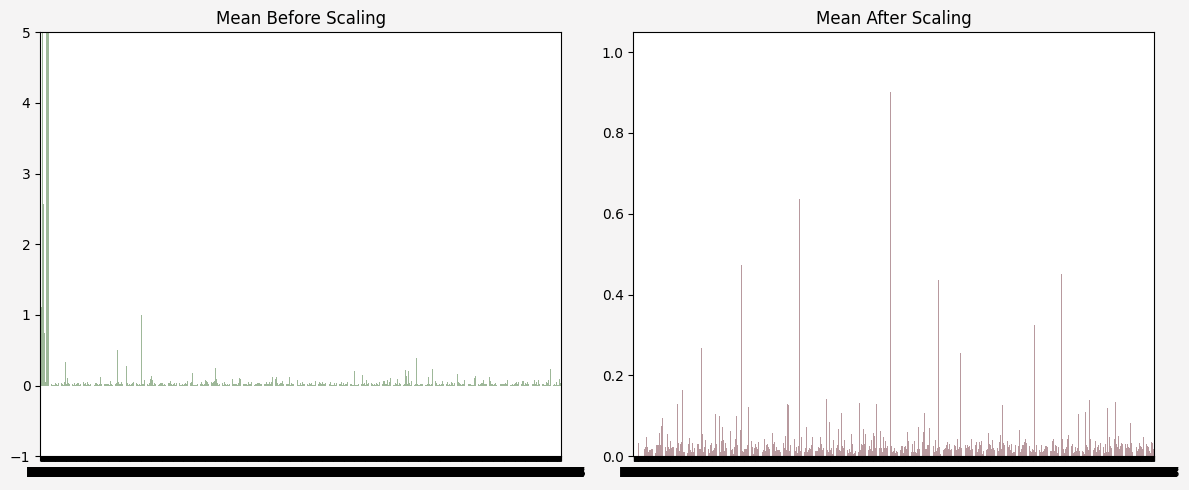

In [131]:
### Check the summary statistics before and after Standardization X_train_df ### 

# Summary statistics before transformation
before_summary_mean = np.mean(X_train_df, axis=0)
before_summary_std = np.std(X_train_df, axis=0)

# Summary statistics after transformation
after_summary_mean = np.mean(X_train_df_scaled, axis=0)
after_summary_std = np.std(X_train_df_scaled, axis=0)

# Reset Matplotlib style
plt.style.use('default')

# Plot a side-by-side comparison of mean and standard deviation
plt.figure(figsize=(12, 5), facecolor="#f5f4f4")

plt.subplot(1, 2, 1)
sns.barplot(x=col_names, y=before_summary_mean, color='#9bbd94')
plt.title('Mean Before Scaling')
plt.ylim(-1,5)

plt.subplot(1, 2, 2)
sns.barplot(x=col_names, y=after_summary_mean, color='#bd949b')
plt.title('Mean After Scaling')

plt.tight_layout()
plt.show()

### 1.3.3. Transformation

#### Log Transformation

In [7]:
### Log Transform the data ###
columns_to_log = X_train_df.columns[~X_train_df.columns.isin(binary_columns)]
X_train_df_log = X_train_df.copy()
X_test_df_log = X_test_df.copy()

X_train_df_log[columns_to_log] = X_train_df_log[columns_to_log].apply(lambda x: np.log1p(x))
X_test_df_log[columns_to_log] = X_test_df_log[columns_to_log].apply(lambda x: np.log1p(x))
X_train_df_log.describe()

,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42
count,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5854.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000,128.000000,5869.000000,5869.000000,5869.000000,5869.000000
mean,6.021745,6.022954,1.768255,0.603775,1.871214,0.586608,1.659539,3.407638,4.052451,1.936975,0.345845,0.341048,1.615918,1.233262,0.898148,0.648019,1.046464,0.455874,0.570386,0.767833,0.025901,0.347516,0.157046,5.171943,3.878054,1.600596,4.762843,2.917503,2.469647,1.987915,1.987915,1.715659,2.885143,2.426435,1.919173,1.919173,1.645477,-inf,3.048717,2.291289,1.716421,1.965313
std,0.272598,0.272629,0.394187,0.523810,0.536875,0.502105,0.377909,0.260733,0.266137,0.399999,0.444172,0.092910,0.223478,0.281961,0.331082,0.387164,0.345289,0.449136,0.344176,0.322023,0.176448,0.497100,0.332368,0.261153,0.615041,0.264066,0.255952,0.249730,0.248468,0.252707,0.252707,0.252684,0.251312,0.246191,0.243826,0.243826,0.242583,NaN,0.282105,0.311421,0.352562,0.334937
min,4.913158,4.913875,0.693147,0.000000,0.000000,0.000000,0.000000,2.397895,2.995732,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.102636,1.444563,-0.582501,3.720875,1.886081,1.460190,0.851679,0.851679,0.630549,1.886081,1.460190,0.729274,0.729274,0.428142,-inf,1.886036,1.066229,0.546658,0.725212
25%,5.880710,5.881597,1.609438,0.000000,1.609438,0.000000,1.386294,3.258097,3.912023,1.791759,0.000000,0.287682,1.609438,1.098612,0.693147,0.693147,0.693147,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,5.036728,3.599502,1.455069,4.630279,2.783333,2.327441,1.840604,1.840604,1.564217,2.749010,2.290403,1.787469,1.787469,1.513806,-2.207275,2.905851,2.140950,1.534287,1.793913
50%,6.040510,6.041444,1.791759,0.693147,1.945910,0.693147,1.609438,3.433987,4.060443,1.945910,0.000000,0.336472,1.609438,1.386294,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,0.000000,0.000000,0.000000,5.188560,3.947390,1.626543,4.777868,2.931897,2.482538,1.987834,1.987834,1.708545,2.898148,2.440012,1.923828,1.923828,1.642214,-1.714798,3.064555,2.305881,1.725533,1.976119
75%,6.159578,6.160517,1.945910,0.693147,2.197225,0.693147,1.945910,3.526361,4.189655,2.197225,0.693147,0.392042,1.791759,1.386294,1.098612,0.693147,1.386294,0.693147,0.693147,1.098612,0.000000,0.693147,0.000000,5.298216,4.223324,1.765432,4.883909,3.037727,2.592518,2.131814,2.131814,1.863371,3.002890,2.546888,2.043143,2.043143,1.775971,-0.776529,3.177176,2.433189,1.872589,2.112773
max,8.234790,8.235430,4.532599,3.871201,4.927254,3.761200,4.077537,5.587249,6.269096,4.543295,3.433987,0.693147,2.708050,2.302585,2.302585,2.197225,2.302585,1.609438,2.079442,2.079442,2.197225,3.401197,2.397895,7.341629,7.220001,2.877433,6.864869,5.023153,4.500031,3.783806,3.783806,3.394474,5.017763,4.488313,3.753920,3.753920,3.355963,0.392042,5.418413,4.859373,4.545460,4.691278


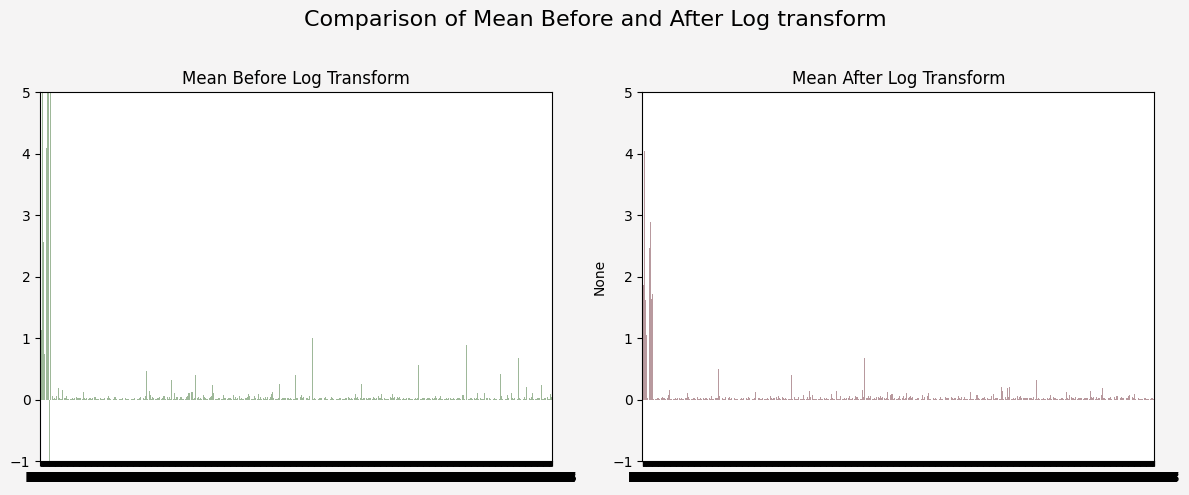

In [8]:
### Check the summary statistics before and after Log Transform ### 

# Summary statistics before transformation
before_summary_mean = np.mean(X_train, axis=0)
before_summary_std = np.std(X_train, axis=0)

# Summary statistics after transformation
after_summary_mean = np.mean(X_train_df_log, axis=0)
after_summary_std = np.std(X_train_df_log, axis=0)

# Reset Matplotlib style
plt.style.use('default')

# Plot a side-by-side comparison of mean and standard deviation
plt.figure(figsize=(12, 5), facecolor="#f5f4f4")

plt.subplot(1, 2, 1)
sns.barplot(x=col_names, y=before_summary_mean, color='#9bbd94')
plt.title('Mean Before Log Transform')
plt.ylim(-1,5)

plt.subplot(1, 2, 2)
sns.barplot(x=col_names, y=after_summary_mean, color='#bd949b')
plt.title('Mean After Log Transform')
plt.ylim(-1,5)

# Add a main title
plt.suptitle('Comparison of Mean Before and After Log transform', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust subplot layout
plt.show()

#### Power Transformation

In [134]:
### Power Transform the Standardized data ###

pt = PowerTransformer(standardize=False) # because we already standardized the data and there are a lot of zeros
X_train_power_transformed_st = pd.DataFrame(pt.fit_transform(X_train_df_scaled), columns=X_train_df.columns)
X_train_power_transformed_st.describe()

D00          D01          D02          D03          D04  \
count  5869.000000  5869.000000  5869.000000  5869.000000  5869.000000   
mean     -0.164635    -0.164624    -0.172339    -0.187217    -0.164724   
std       0.612310     0.612703     0.556064     0.406245     0.547412   
min      -2.908169    -2.909278    -1.695472    -0.702026    -1.690123   
25%      -0.481616    -0.482644    -0.401831    -0.702026    -0.501574   
50%      -0.062486    -0.063173    -0.105994    -0.083239    -0.090630   
75%       0.209090     0.208621     0.125966    -0.083239     0.207259   
max       3.059570     3.063205     2.462107     1.105440     2.540557   

               D05          D06          D07          D08          D09  \
count  5869.000000  5869.000000  5869.000000  5869.000000  5869.000000   
mean     -0.186400    -0.190960    -0.164522    -0.171160    -0.176433   
std       0.435444     0.717996     0.600309     0.576488     0.633845   
min      -0.742938    -2.783197    -2.870441    -2.920538    -2.006831   
25%      -0.742938    -0.740932    -0.517115    -0.477870    -0.414739   
50%      -0.056177    -0.263784    -0.037336    -0.086158    -0.138625   
75%      -0.056177     0.389744     0.179737     0.203771     0.274938   
max       1.293300     3.568485     2.948518     2.610635     3.071797   

               D10          D11          D12          D13          D14  \
count  5869.000000  5869.000000  5869.000000  5869.000000  5869.000000   
mean     -0.248250    -0.083274    -0.100298    -0.104303    -0.151905   
std       0.475875     0.986462     0.959305     0.969037     0.940693   
min      -0.653877    -3.870332    -4.845396    -3.293811    -2.470607   
25%      -0.653877    -0.636766    -0.137808    -0.614395    -0.780934   
50%      -0.653877    -0.095714    -0.137808     0.408031    -0.780934   
75%       0.222581     0.483358     0.656570     0.408031     0.431531   
max       1.014722     3.436311     5.297913     4.321914     4.378081   

               D15          D16          D17          D18          D19  \
count  5869.000000  5869.000000  5869.000000  5869.000000  5869.000000   
mean     -0.128133    -0.083792    -0.227737    -0.024996    -0.098752   
std       0.954957     0.985915     0.934076     0.995864     0.982851   
min      -1.649250    -2.441952    -1.181346    -1.523202    -2.209231   
25%      -0.070395    -1.148555    -1.181346     0.218891    -0.402593   
50%      -0.070395    -0.010721     0.282524     0.218891    -0.402593   
75%      -0.070395     0.927580     0.282524     0.218891     0.957219   
max       4.933768     5.169790     2.125742     9.136260     5.481747   

               D20          D21          D22          D23          D24  \
count  5869.000000  5869.000000  5869.000000  5869.000000  5869.000000   
mean      0.000742    -0.763193    -0.321730    -0.661217    -0.164079   
std       0.004034     0.121163     0.482578     0.479956     0.603785   
min      -0.000000    -0.781283    -0.695047    -0.898245    -2.996871   
25%       0.000000    -0.781283    -0.695047    -0.898245    -0.476844   
50%       0.000000    -0.781283    -0.695047    -0.898245    -0.062082   
75%       0.000000    -0.781283     0.169859    -0.898245     0.197072   
max       0.022676     0.048179     0.733670     0.336591     2.981705   

               D25          D26          D27          D28          D29  \
count  5869.000000  5869.000000  5869.000000  5869.000000  5869.000000   
mean     -0.170430     0.002614    -0.165985    -0.166043    -0.170276   
std       0.462287     0.999996     0.614725     0.606651     0.633736   
min      -1.447464   -10.158124    -3.072234    -3.142195    -3.202217   
25%      -0.445889    -0.576706    -0.483692    -0.493395    -0.536984   
50%      -0.123414    -0.009594    -0.063865    -0.062212    -0.066213   
75%       0.130808     0.525389     0.196647     0.200679     0.218075   
max       1.701872     9.042901     3.009133     2.955801     3.076728   

             

In [135]:
# Check if NaN values were introduced

print("Number of NaN values in X_train_power_transformed_st:", X_train_power_transformed_st.isnull().sum().sum())

Number of NaN values in X_train_power_transformed_st: 0


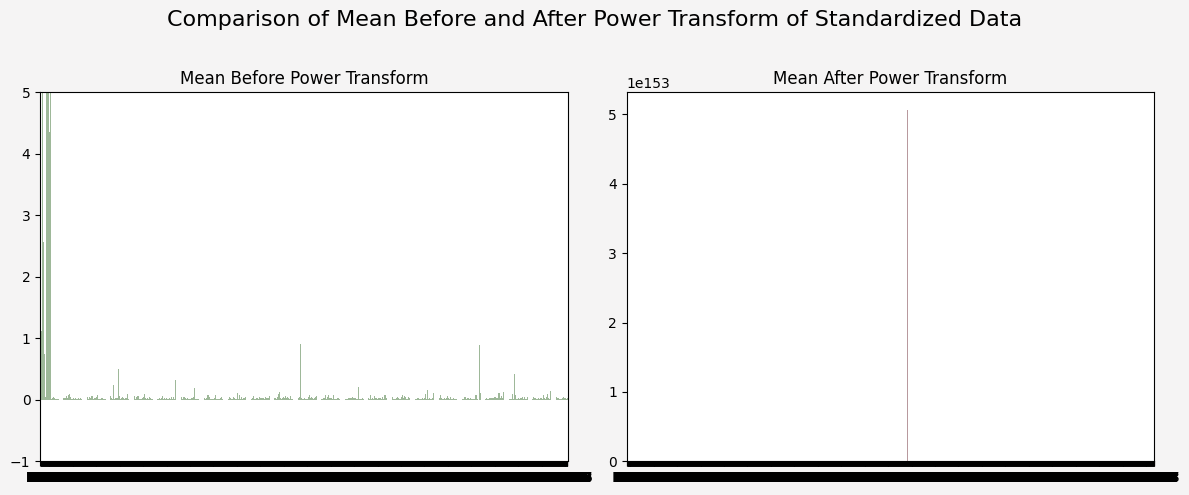

In [136]:
### Check the summary statistics before and after Power Transform ### 

# Summary statistics before transformation
before_summary_mean = np.mean(X_train_df, axis=0)
before_summary_std = np.std(X_train_df, axis=0)

# Summary statistics after transformation
after_summary_mean = np.mean(X_train_power_transformed_st, axis=0)
after_summary_std = np.std(X_train_power_transformed_st, axis=0)

# Reset Matplotlib style
plt.style.use('default')

# Plot a side-by-side comparison of mean and standard deviation
plt.figure(figsize=(12, 5), facecolor="#f5f4f4")

plt.subplot(1, 2, 1)
sns.barplot(x=col_names, y=before_summary_mean, color='#9bbd94')
plt.title('Mean Before Power Transform')
plt.ylim(-1,5)

plt.subplot(1, 2, 2)
sns.barplot(x=col_names, y=after_summary_mean, color='#bd949b')
plt.title('Mean After Power Transform')

# Add a main title
plt.suptitle('Comparison of Mean Before and After Power Transform of Standardized Data', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust subplot layout
plt.show()



In [137]:
### Power Transform the non Standardized data (but with the standardize options off as the data has too many zeroes ###

pt = PowerTransformer(standardize=False) # because the data has a lot of zeros
X_train_power_transformed = pd.DataFrame(pt.fit_transform(X_train_df), columns=X_train_df.columns)
X_train_power_transformed.iloc[:, :5].describe()

,D00,D01,D02,D03,D04
count,5869.000000,5869.000000,5869.000000,5869.000000,5869.000000
mean,1.911382,1.914707,1.421356,0.480075,2.098104
std,0.013136,0.013212,0.251057,0.372930,0.655513
min,1.837980,1.840903,0.637212,-0.000000,0.000000
25%,1.904928,1.908199,1.328748,0.000000,1.761390
50%,1.913208,1.916527,1.448693,0.591667,2.170900
75%,1.918963,1.922315,1.545987,0.591667,2.486853
max,1.979735,1.983485,2.730666,1.784037,6.548700


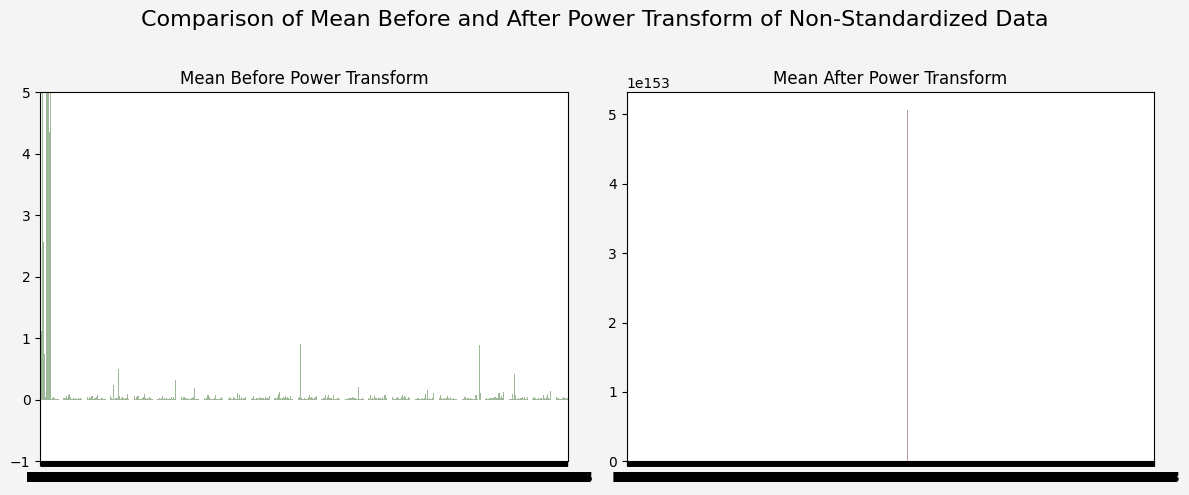

In [139]:
### Check the summary statistics before and after Power Transform ### 

# Summary statistics before transformation
before_summary_mean = np.mean(X_train_df, axis=0)
before_summary_std = np.std(X_train_df, axis=0)

# Summary statistics after transformation
after_summary_mean = np.mean(X_train_power_transformed, axis=0)
after_summary_std = np.std(X_train_power_transformed, axis=0)

# Reset Matplotlib style
plt.style.use('default')

# Plot a side-by-side comparison of mean and standard deviation
plt.figure(figsize=(12, 5), facecolor="#f5f4f4")
plt.title('Power Transform of Non Standardized Data')

plt.subplot(1, 2, 1)
sns.barplot(x=col_names, y=before_summary_mean, color='#9bbd94')
plt.title('Mean Before Power Transform')
plt.ylim(-1,5)

plt.subplot(1, 2, 2)
sns.barplot(x=col_names, y=after_summary_mean, color='#bd949b')
plt.title('Mean After Power Transform')

# Add a main title
plt.suptitle('Comparison of Mean Before and After Power Transform of Non-Standardized Data', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust subplot layout
plt.show()

#### 1.4. PCA

We are going to try different methods to find the appropriate number of principal components.

In [140]:
### Create a PCA instance ###

pca = PCA() # trying with all the features initially to decide how many to keep
pca_transformed = pca.fit_transform(X_train_df_scaled) # fit and transform the standardized data

1) Kaiser criterion: Select only the components with eigenvalues > 1

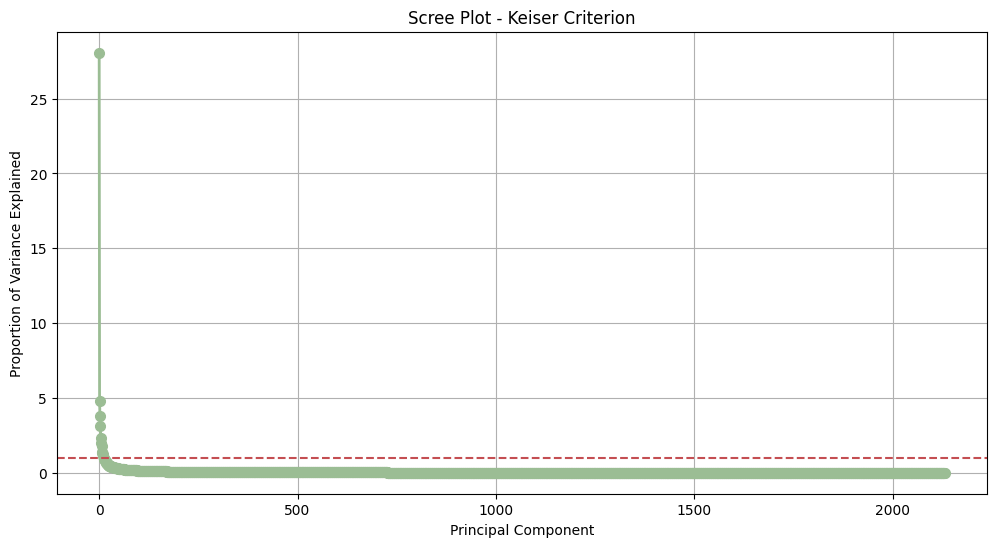

In [141]:
### Alternative way to plot the Scree plot - Keiser criterion ###

# Extract portion of variance explained by each component
variance = pca.explained_variance_

# # Enumerate component numbers
pc_number = np.arange(pca.n_components_)

# Alternative screen plot
plt.figure(figsize=(12, 6))
plt.plot(pc_number, variance, color='#9bbd94', marker='o', linestyle='solid', linewidth=2, markersize=7)
plt.title('Scree Plot - Keiser Criterion')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.axhline(y=1, color='r', linestyle='--') 
plt.grid()
plt.show()

Zoomed in

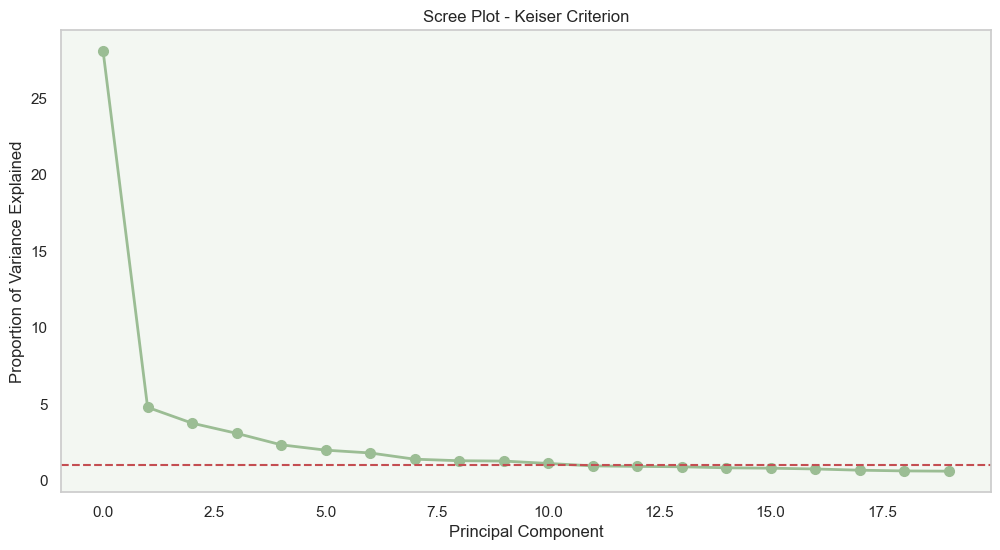

In [173]:
### Alternative way to plot the Scree plot - Keiser criterion ###

# Extract portion of variance explained by each component
variance = pca.explained_variance_

# Alternative screen plot
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#f3f7f2"})
plt.figure(figsize=(12, 6)) # 12, 6
plt.plot(pc_number[:20], variance[:20], color='#9bbd94', marker='o', linestyle='solid', linewidth=2, markersize=7)
plt.title('Scree Plot - Keiser Criterion')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.axhline(y=1, color='r', linestyle='--') 
plt.grid()
plt.show()

In [143]:
####### WITH EXPLAINED VARIANCE ###########

number_of_components = len(list(filter(lambda x: x > 1, pca.explained_variance_)))  
print(f'Suggested number of principal components: {number_of_components}')

Suggested number of principal components: 11


This approach suggests 11 PCs

2) Decide based on the cumulative variance explained by PC - we would like to explain e.g. at least 70% of the variance

In [144]:
tve=0
for i, ve in enumerate(pca.explained_variance_ratio_):
    tve+=ve
    if tve > 0.7:
        break

print("PC%d - Variance explained: %7.4f - Total Variance: %7.4f" % (i+1, ve, tve))

PC98 - Variance explained:  0.0013 - Total Variance:  0.7010


This approach suggests 98 principal components

3) Decide based on the elbow point

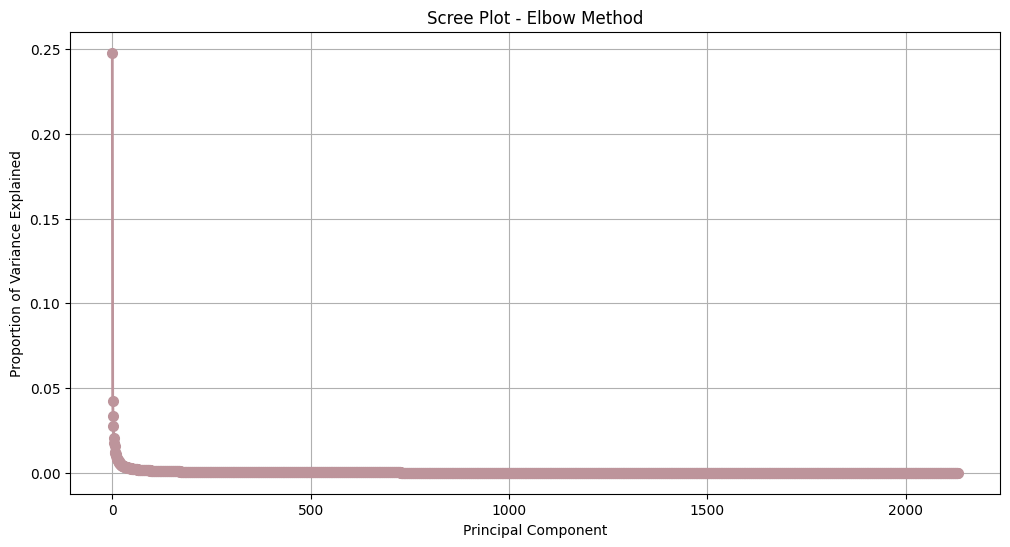

In [145]:
### Proportion of variance explained by each component - Elbow plot ###

# Extract portion of variance explained by each component
variance_ratio = pca.explained_variance_ratio_
# print(list(variance_ratio))

# Scree plot
plt.figure(figsize=(12, 6))
plt.plot(pc_number, variance_ratio, color='#bd949b', marker='o', linestyle='solid', linewidth=2, markersize=7)
plt.title('Scree Plot - Elbow Method')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.grid()
plt.show()

Zoomed in

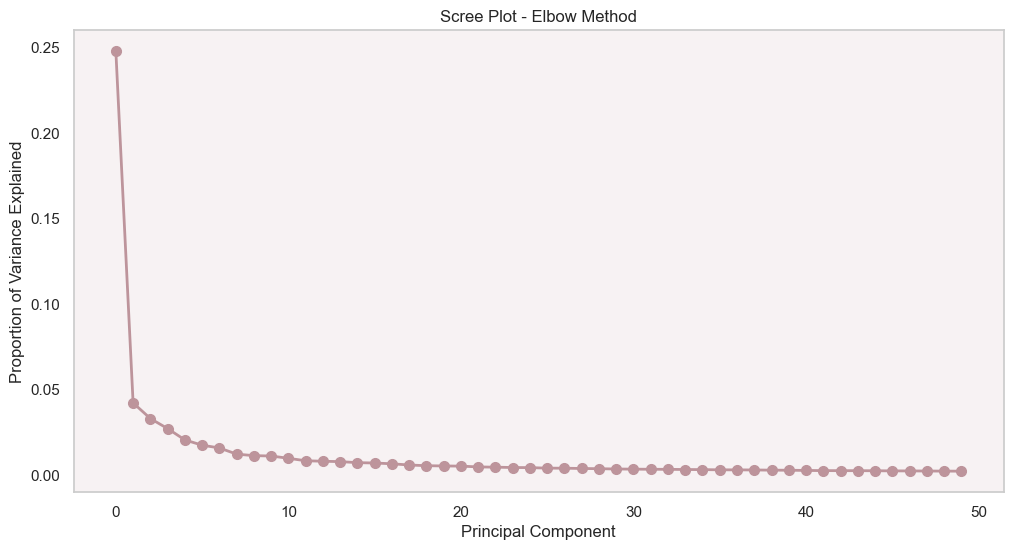

In [174]:
### Proportion of variance explained by each component - Elbow plot ZOOMED IN ###

sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#f7f2f3"})
plt.figure(figsize=(12, 6))
plt.plot(pc_number[:50], variance_ratio[:50], color='#bd949b', marker='o', linestyle='solid', linewidth=2, markersize=7)
plt.title('Scree Plot - Elbow Method')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.grid()
plt.show()


According to the elbow point we should consider 7 principal components

#### Summary of PCA
Various approaches suggest different numbers of principal components. The Kaiser criterion recommends 11 PCs, the cumulative variance approach suggests 98, and the elbow point method indicates 7. Therefore, we can experiment with all three options: 7, 11, and 98 principal components.

## 2. Regression models

In [147]:
### Loading the preprocessed data ###

# Data with RF feature selection
X_train_best_features_rf = X_train_df_scaled[most_important_features_rf] 
X_test_best_features_rf = X_test_df_scaled[most_important_features_rf]

In [175]:
### Batch testing of different models ###

# List of preprocessed datasets
preprocessed_datasets = {
    'Entire dataset': [X_train_df, Y_train_df],
    'Best Features RF': [X_train_best_features_rf, Y_train_df],
    '98% Zero Values Removed': [X_train_98_nozeros, Y_train_df],
    'Small Variance Removed': [X_train_df_small_var, Y_train_df]
}

# Regression models to test
models = {
    'Random Forest': RandomForestRegressor(),
    # 'Linear Regression': LinearRegression(),
    # 'Support Vector Machine': SVR(kernel='rbf'),
    # 'AdaBoost': AdaBoostRegressor(),
    # 'Bagging': BaggingRegressor(),
    # 'KNeighborsRegressor': KNeighborsRegressor(),
}

# Define scoring functions
scoring = {
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error)
}

# Choose scaling methods
scaling_methods = [
    ('Standard Scaler', StandardScaler()),
    ('Power Transform', PowerTransformer()),
    ('Power Transform Standardized', PowerTransformer(standardize=False)),
    ('Log Transform', FunctionTransformer(lambda x: np.log1p(x + 1e-10), inverse_func=lambda x: np.expm1(x) - 1e-10))

]

# Choose PCA components
n_components_list = [False, 7, 11, 98] 

results = []

# Iterate over preprocessed datasets
for dataset_name, dataset in preprocessed_datasets.items():
    X, y = dataset
    for model_name, model in models.items():
        for scaling_name, scaler in scaling_methods:
            for n_components in n_components_list:
                # if we have more principal components than features/rows then skip this iteration
                if n_components and n_components > min(X.shape):
                    continue

                kfold = KFold(n_splits=5, shuffle=True, random_state=42)
                
                # Create a ColumnTransformer with scaling for non-binary columns
                preprocessor = ColumnTransformer(
                    transformers=[
                        # apply scaling only to non-binary columns
                        ('numeric', scaler, X.columns.difference(binary_columns))
                    ],
                    remainder='passthrough'  # Include binary columns without scaling
                )

                # if number of PC defined - we perform PCA, otherwise - we don't
                if n_components:
                    # Create a pipeline with the preprocessor, PCA, and the model
                    pipeline = make_pipeline(preprocessor, PCA(n_components=n_components),  SimpleImputer(), model) # SimpleImputer() - to handle NaN's
                else:
                    # Create a pipeline with the preprocessor, PCA, and the model
                    pipeline = make_pipeline(preprocessor, SimpleImputer(), model) # SimpleImputer() - to handle NaN's
                
                # perform cross validation
                cv_results = cross_validate(pipeline, X, y, cv=kfold, scoring=scoring)
                
                # Store results
                results.append({
                    'Model': model_name,
                    'Dataset': dataset_name,
                    'PCA': n_components,
                    'Scaling': scaling_name,
                    'MSE': np.mean(cv_results['test_mse']),
                    'MAE': np.mean(cv_results['test_mae']),
                    'R2': np.mean(cv_results['test_r2']),
                })
                print(model)

# Convert results to a DataFrame for easy visualization
results_df = pd.DataFrame(results)

In [162]:
### View the results ###

results_df.sort_values(by='R2', ascending=False)

,Model,Dataset,PCA,Scaling,MSE,MAE,R2
208,Support Vector Machine,98% Zero Values Removed,False,Power Transform,0.026792,0.125730,0.650041
304,Support Vector Machine,Small Variance Removed,False,Power Transform,0.027036,0.126643,0.646825
204,Support Vector Machine,98% Zero Values Removed,False,Standard Scaler,0.027067,0.125834,0.646446
16,Support Vector Machine,Entire dataset,False,Power Transform,0.027125,0.126891,0.645672
300,Support Vector Machine,Small Variance Removed,False,Standard Scaler,0.027238,0.126583,0.644177
...,...,...,...,...,...,...,...
273,Lasso,98% Zero Values Removed,9,Power Transform Standardized,0.076729,0.228266,-0.000959
272,Lasso,98% Zero Values Removed,False,Power Transform Standardized,0.076729,0.228266,-0.000959
271,Lasso,98% Zero Values Removed,98,Power Transform,0.076729,0.228266,-0.000959
270,Lasso,98% Zero Values Removed,11,Power Transform,0.076729,0.228266,-0.000959


In [166]:
### Export results to CSV ###
results_df.to_csv('results.csv', index=False)

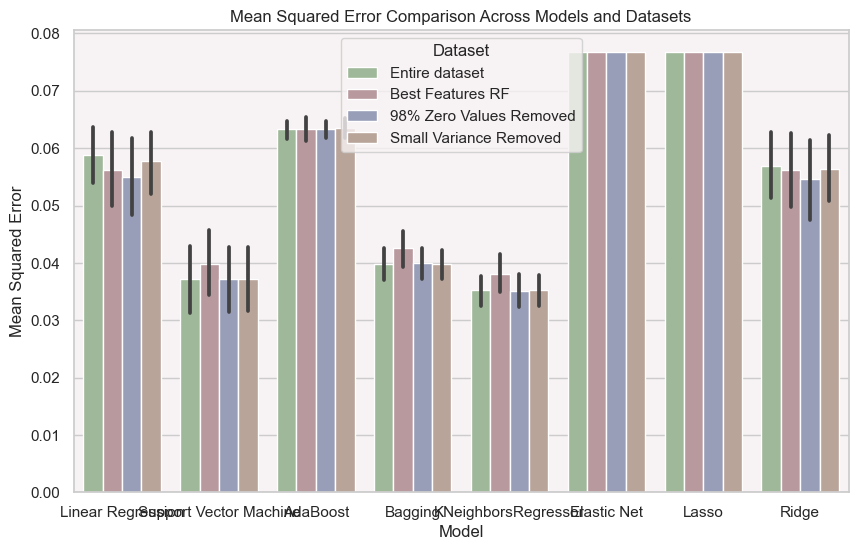

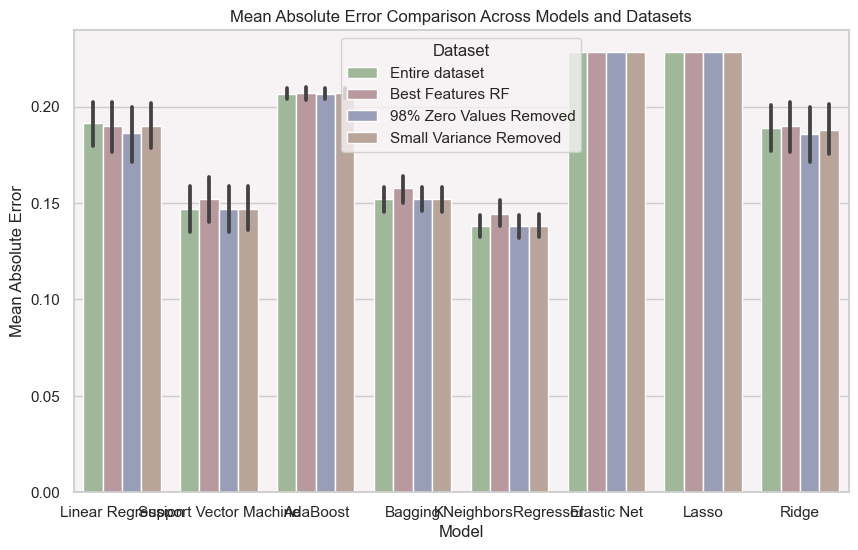

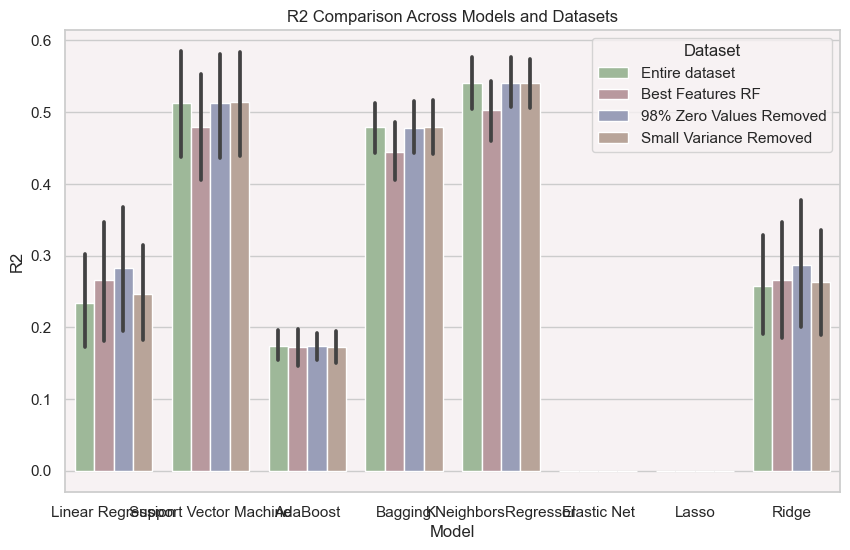

In [161]:
def plot_results(results, metric, label):
    custom_palette = ['#9bbd94', '#bd949b', '#949bbd', '#bda294']
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric, hue='Dataset', data=results, palette=custom_palette)
    plt.title(f'{label} Comparison Across Models and Datasets')
    plt.ylabel(label)
    plt.show()

plot_results(results_df, 'MSE', 'Mean Squared Error')
plot_results(results_df, 'MAE', 'Mean Absolute Error')
plot_results(results_df, 'R2', 'R2')

### 2.1 Training the models

In [9]:
# Empty dataFrame that will have all the results including the best params - to be printed at the end
results_hyperparam = pd.DataFrame(columns=['Model', 'R2', 'Best Params'])

#### 2.2.1 Support Vector Machines with 98% zero values removed, no PCA used and power transform

In [12]:
#Import dataset with 98% zero values removed and power transform

# Standardize the selected features
scaler = StandardScaler()
columns_to_scale = X_train_98_nozeros.columns[~X_train_98_nozeros.columns.isin(binary_columns)]

X_train_df_scaled_SVM = X_train_98_nozeros.copy()

X_train_df_scaled_SVM[columns_to_scale] = scaler.fit_transform(X_train_98_nozeros[columns_to_scale])

pt = PowerTransformer(standardize=False) # because the data has a lot of zeros
X_train_SVM = pd.DataFrame(pt.fit_transform(X_train_df_scaled_SVM), columns=X_train_df_scaled_SVM.columns)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

svm = SVR(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='r2')

grid_search.fit(X_train_SVM, Y_train_df)
results_hyperparam.loc[len(results_hyperparam)] = ['Support Vector Machines', grid_search.best_score_, grid_search.best_params_]
print("Best Parameters: ", grid_search.best_params_)
print("Best R2 Score: %.2f" % (grid_search.best_score_))


#### 2.2.2 Linear regression with 98% zero values removed, no PCA used and standart scaler

In [ ]:
scaler = StandardScaler()
columns_to_scale = X_train_98_nozeros.columns[~X_train_98_nozeros.columns.isin(binary_columns)]

X_train_df_scaled_LR = X_train_98_nozeros.copy()
X_test_df_scaled_LR = X_train_98_nozeros.copy()

X_train_df_scaled_LR[columns_to_scale] = scaler.fit_transform(X_train_98_nozeros[columns_to_scale])
X_test_df_scaled_LR[columns_to_scale] = scaler.fit_transform(X_train_98_nozeros[columns_to_scale])

param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
}

lr = LinearRegression()
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='r2')

grid_search.fit(X_train_df_scaled_LR, Y_train_df)
results_hyperparam.loc[len(results_hyperparam)] = ['Linear Regression', grid_search.best_score_, grid_search.best_params_]
print("Best Parameters: ", grid_search.best_params_)
print("Best R2 Score: %.2f" % (grid_search.best_score_))

ValueError: Invalid parameter 'C' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

#### 2.2.3 AdaBoost with small variance removed, 98 PCA features and power transformation

In [ ]:
scaler = StandardScaler()
columns_to_scale = X_train_df_small_var.columns[~X_train_df_small_var.columns.isin(binary_columns)]

X_train_df_scaled_AdaB = X_train_df_small_var.copy()

X_train_df_scaled_AdaB[columns_to_scale] = scaler.fit_transform(X_train_98_nozeros[columns_to_scale])

pt = PowerTransformer(standardize=False) # because the data has a lot of zeros
X_train_AdaB = pd.DataFrame(pt.fit_transform(X_train_df_scaled_AdaB), columns=X_train_df_scaled_AdaB.columns)

pca = PCA(n_components=98)
pca_transformed = pca.fit_transform(X_train_AdaB)

param_grid = {
    'base_estimator': [DecisionTreeRegressor(max_depth=1), DecisionTreeRegressor(max_depth=2)],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

ada_boost = AdaBoostRegressor()
grid_search = GridSearchCV(ada_boost, param_grid, cv=5, scoring='r2')

grid_search.fit(X_train_AdaB, Y_train_df)

results_hyperparam.loc[len(results_hyperparam)] = ['AdaBoost', grid_search.best_score_, grid_search.best_params_]
print("Best Parameters: ", grid_search.best_params_)
print("Best R2 Score: %.2f" % (grid_search.best_score_))


#### 2.2.4 Bagging with entire dataset, no PCA used and power transformation

In [ ]:
# Standardize the selected features
scaler = StandardScaler()
columns_to_scale = X_train_df.columns[~X_train_df.columns.isin(binary_columns)]

X_train_df_scaled = X_train_df.copy()

X_train_df_scaled[columns_to_scale] = scaler.fit_transform(X_train_df[columns_to_scale])
pt = PowerTransformer(standardize=False) # because we already standardized the data and there are a lot of zeros
X_train_power_transformed_st = pd.DataFrame(pt.fit_transform(X_train_df_scaled), columns=X_train_df.columns)

param_grid = {
    'n_estimators': [50, 100, 200],     # Number of trees in the forest
    'max_depth': [None, 10, 20],        # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required to be at a leaf node
}

bagging = BaggingRegressor()
grid_search = GridSearchCV(bagging, param_grid, cv=5, scoring='r2')

grid_search.fit(X_train_power_transformed_st, Y_train_df)
results_hyperparam.loc[len(results_hyperparam)] = ['Bagging', grid_search.best_score_, grid_search.best_params_]
print("Best Parameters: ", grid_search.best_params_)
print("Best R2 Score: %.2f" % (grid_search.best_score_))

#### 2.2.5 K-Neighbours Regressor with 98% zero values removed, no PCA used and standart scaler

In [ ]:
scaler = StandardScaler()
columns_to_scale = X_train_98_nozeros.columns[~X_train_98_nozeros.columns.isin(binary_columns)]

X_train_df_scaled_KN = X_train_98_nozeros.copy()

X_train_df_scaled_KN[columns_to_scale] = scaler.fit_transform(X_train_98_nozeros[columns_to_scale])

param_grid = {
    'n_neighbors': [3, 5, 7, 10],          # Number of neighbors
    'weights': ['uniform', 'distance'],    # Weight function used in prediction
    'metric': ['euclidean', 'manhattan'],  # Distance metric
    'p': [1, 2]                             # Power parameter for Minkowski distance
}

kn = KNeighborsRegressor()
grid_search = GridSearchCV(kn, param_grid, cv=5, scoring='r2')

grid_search.fit(X_train_df_scaled_KN, Y_train_df)
results_hyperparam.loc[len(results_hyperparam)] = ['K-Neighbors Regressor', grid_search.best_score_, grid_search.best_params_]
print("Best Parameters: ", grid_search.best_params_)
print("Best R2 Score: %.2f" % (grid_search.best_score_))

## 3. Predictions calculation

## 4. Results